Perform Hierarchical Drift-Diffusion Modeling of the StateSwitch Dynamic Responses using the HDDM toolbox

Note that for some reason, the saving of models only works when running the script in Python 2.
The following commands can be used to switch between the two python installations in the terminal.

source activate py27
source activate py36

It should also be possible to switch between kernels in Jupyter Notebook.

In [1]:
# Script was originally run using Python 3
# Run the following command in Terminal to install HDDM package
# conda install -c pymc hddm

import hddm
print("HDDM version: "+ hddm.__version__)

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version: "+ np.__version__) # version <=1.11 necessary for pymc2 (https://groups.google.com/forum/#!topic/hddm-users/Jdwm_IoJk5U)

import scipy.io as io

import warnings
warnings.filterwarnings('ignore')
print("Important: Warnings disabled for improved clarity")

import pickle

def savePatch(self, fname):
    with open(fname, 'wb') as f:
        pickle.dump(self, f)


/Users/kosciessa/anaconda3/envs/py35/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


HDDM version: 0.6.0
Numpy version: 1.14.0
Important: Warnings disabled for improved clarity


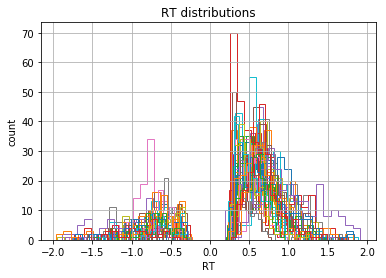

In [2]:
# get data from numpy structured array

group = 'YA'

dataPath = '/Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/';
csvData = dataPath+'StateSwitchDynamicTrialData_MRI_'+group+'_TargetAgreement.dat';

savePath = '/Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRIAgree/'

########################
## Load and flip data ##
########################

data = hddm.load_csv(csvData)
data.rename(columns={'acc':'response'}, inplace=True)
data.rename(columns={'subject':'subj_idx'}, inplace=True)

dataFlipped = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dataFlipped.groupby('subj_idx'):
    subj_data.rt.hist(bins=40, histtype='step', ax=ax)
    

In [3]:
is_agree = data.agree == 1
is_l4 = data.dim == 4

data[data.agree == 6]

subj_idx  response       rt  agree  dim  att  age    ID
0             1         0  0.43706      6    1    4    1  1117
1             1         0  0.54961      6    1    4    1  1117
2             1         1  0.53704      6    1    4    1  1117
3             1         1  0.59608      6    1    4    1  1117
4             1         1  0.47239      6    1    4    1  1117
5             1         1  0.41855      6    1    4    1  1117
6             1         1  0.39665      6    1    4    1  1117
7             1         0  0.42681      6    1    4    1  1117
12            1         1  0.95070      6    4    3    1  1117
14            1         1  0.79834      6    4    2    1  1117
17            1         1  0.84891      6    2    2    1  1117
21            1         1  0.37360      6    2    1    1  1117
26            1         0  0.84549      6    3    4    1  1117
32            1         1  0.42933      6    1    2    1  1117
33            1         1  0.43063      6    1    2    1  1117
34            1         1  0.48087      6    1    2    1  1117
35            1         1  0.46795      6    1    2    1  1117
36            1         1  0.46822      6    1    2    1  1117
37            1         1  0.51436      6    1    2    1  1117
38            1         1  0.35948      6    1    2    1  1117
39            1         1  0.50658      6    1    2    1  1117
43            1         1  0.89640      6    4    3    1  1117
47            1         1  0.62005      6    4    1    1  1117
53            1         1  1.02710      6    3    4    1  1117
55            1         1  0.88539      6    3    1    1  1117
57            1         0  1.25090      6    2    4    1  1117
60            1         1  0.70431      6    2    3    1  1117
61            1         0  1.02330      6    2    4    1  1117
62            1         0  0.99066      6    2    3    1  1117
63            1         1  0.71381      6    2    3    1  1117
...         ...       ...      ...    ...  ...  ...  ...   ...
11042        49         1  0.46372      6    1    1    1  1281
11052        49         1  0.69155      6    3    3    1  1281
11053        49         1  0.57176      6    3    3    1  1281
11058        49         1  0.57250      6    3    1    1  1281
11059        49         1  0.49095      6    2    1    1  1281
11061        49         1  0.60031      6    2    3    1  1281
11063        49         1  0.50962      6    2    1    1  1281
11066        49         1  0.51705      6    2    1    1  1281
11074        49         1  0.76962      6    4    3    1  1281
11075        49         1  0.58580      6    1    4    1  1281
11076        49         1  0.44095      6    1    4    1  1281
11077        49         1  0.45527      6    1    4    1  1281
11078        49         1  0.33033      6    1    4    1  1281
11079        49         1  0.37349      6    1    4    1  1281
11080        49         1  0.44965      6    1    4    1  1281
11081        49         1  0.40976      6    1    4    1  1281
11082        49         0  0.42493      6    1    4    1  1281
11085        49         1  0.70644      6    3    2    1  1281
11086        49         1  0.50269      6    3    1    1  1281
11094        49         1  0.87196      6    4    4    1  1281
11101        49         1  0.59820      6    2    1    1  1281
11102        49         1  0.74525      6    2    2    1  1281
11107        49         1  0.55221      6    1    2    1  1281
11108        49         1  0.42631      6    1    2    1  1281
11109        49         1  0.40172      6    1    2    1  1281
11110        49         1  0.43585      6    1    2    1  1281
11111        49         1  0.35179      6    1    2    1  1281
11112        49         1  0.47696      6    1    2    1  1281
11113        49         1  0.40923      6    1    2    1  1281
11114        49         1  0.50833      6    1    2    1  1281

[5170 rows x 8 columns]

In [4]:
#m_stim_v_a_t_byAge.print_stats()

Run additional models with fewer parameters, as indicated by EEG

In [5]:
m_dim_agree_v_t = hddm.HDDM(data, depends_on={'v': ['dim', 'agree'], 't': ['dim', 'agree']}, p_outlier=.05)
m_dim_agree_v_t.find_starting_values()
m_dim_agree_v_t.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_stim_v_t will be saved at: '+ savePath+'m_dim_agree_v_t')
m_dim_agree_v_t.savePatch = savePatch(m_dim_agree_v_t, savePath+'m_dim_agree_v_t')
# save individual results as CSV
dataMat = m_dim_agree_v_t.get_traces()
fileName = 'm_dim_agree_v_t.csv'
print('Data will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

 [-----------------100%-----------------] 7000 of 7000 complete in 1736.9 secModel m_stim_v_t will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRIAgree/m_dim_agree_v_t
Data will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRIAgree/m_dim_agree_v_t.csv


In [6]:
#m_dim_agree_v_t = pickle.load(open(savePath+'m_dim_agree_v_t', 'rb'))

Plotting a
Plotting a_std
Plotting v(1.4)
Plotting v(2.3)
Plotting v(3.2)
Plotting v(3.4)
Plotting v(4.3)
Plotting v(5.4)
Plotting v(6.1)
Plotting v(6.2)
Plotting v(6.3)
Plotting v(6.4)
Plotting v_std
Plotting t(1.4)
Plotting t(2.3)
Plotting t(3.2)
Plotting t(3.4)
Plotting t(4.3)
Plotting t(5.4)
Plotting t(6.1)
Plotting t(6.2)
Plotting t(6.3)
Plotting t(6.4)
Plotting t_std


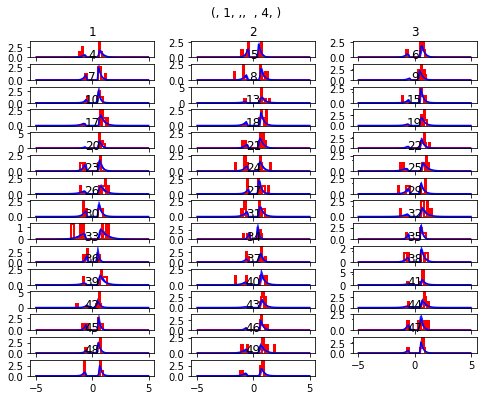

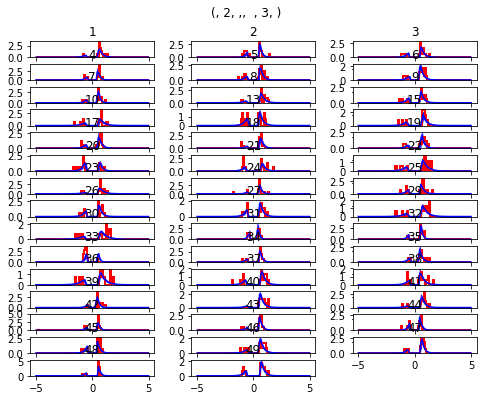

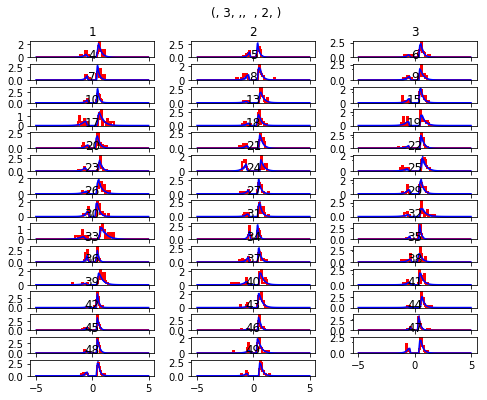

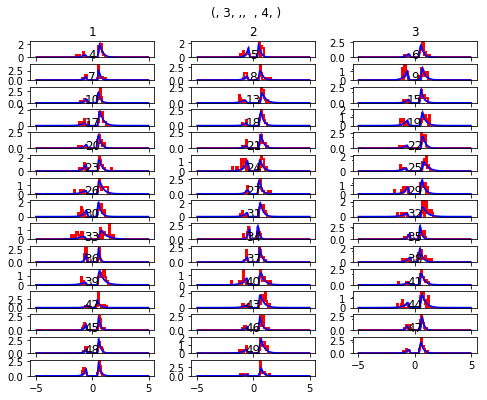

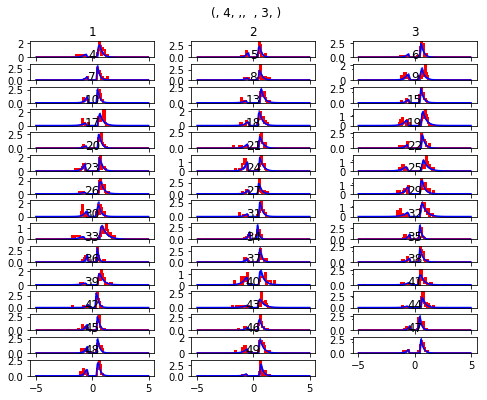

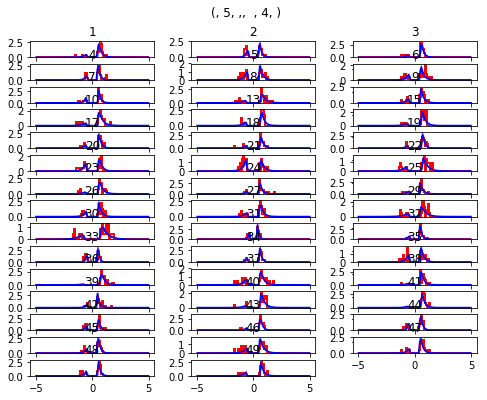

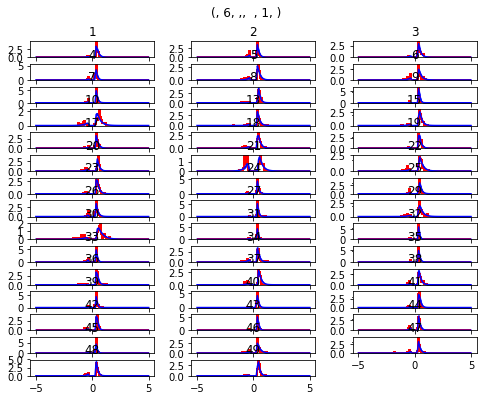

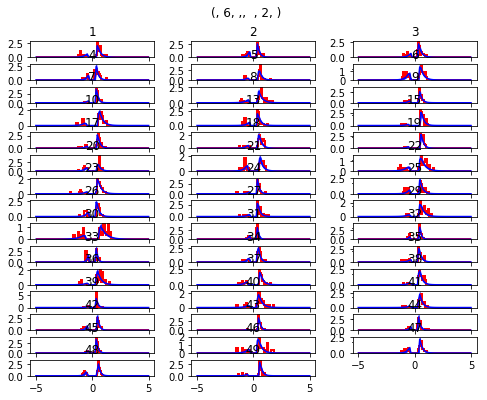

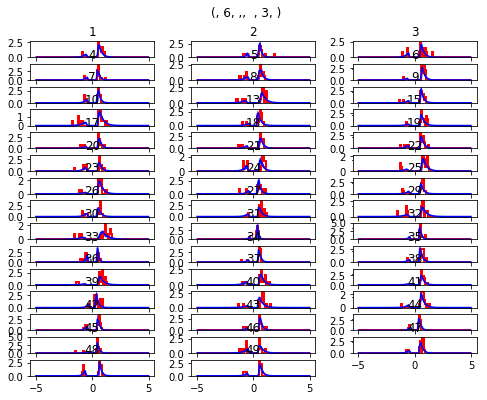

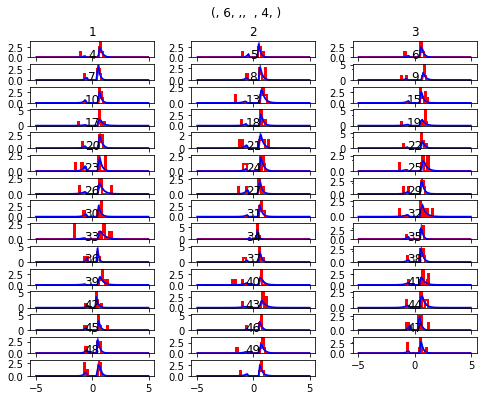

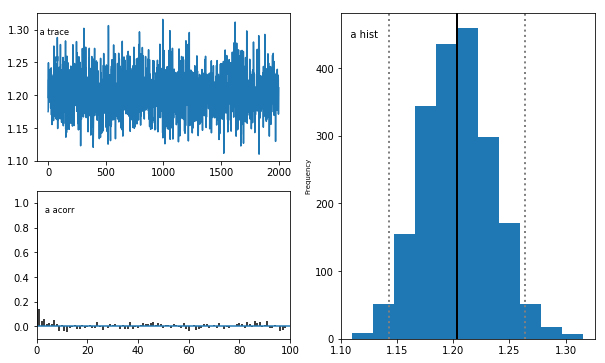

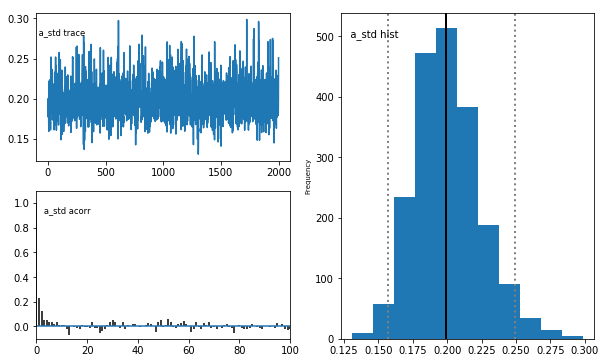

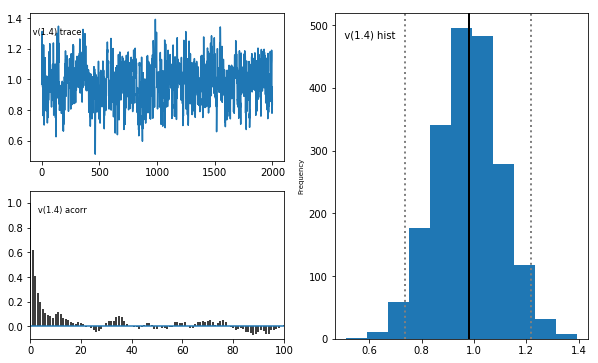

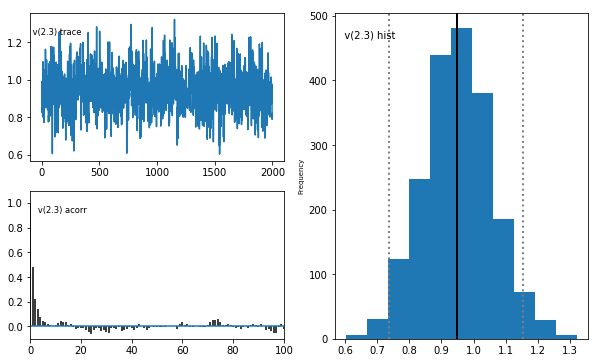

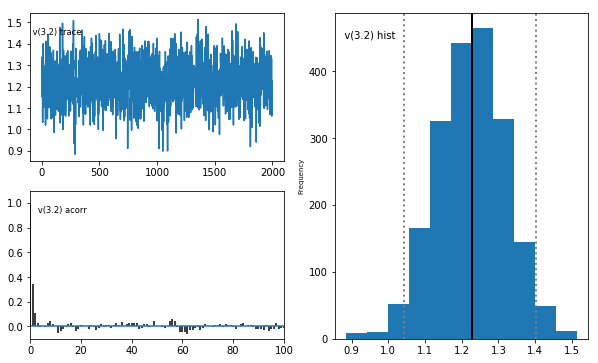

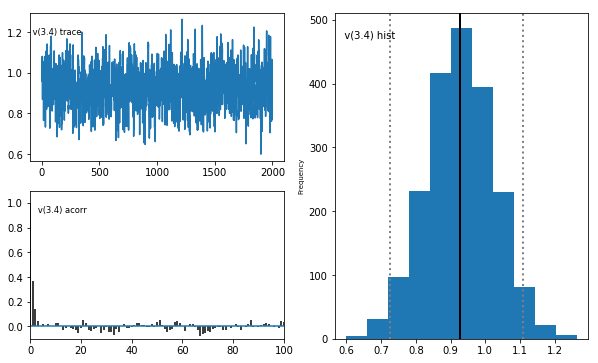

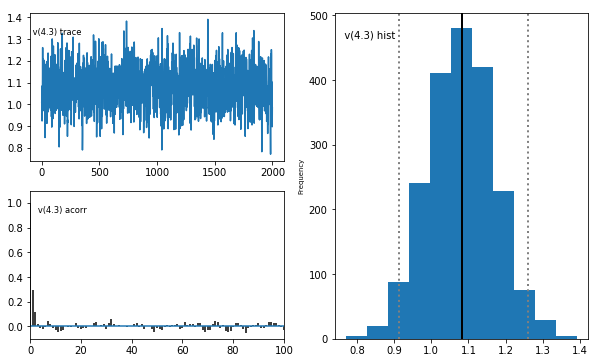

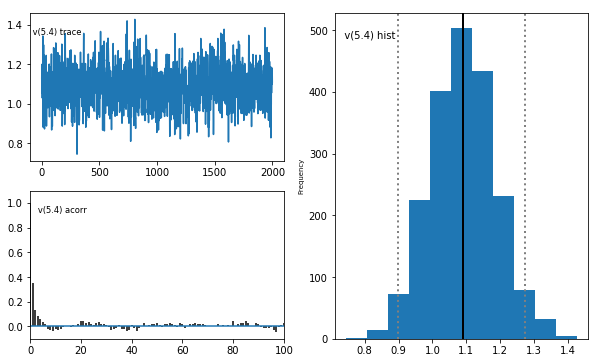

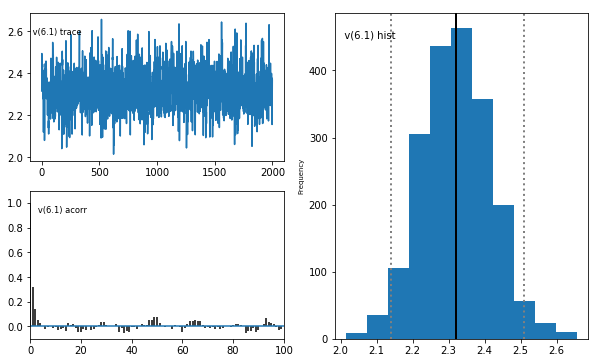

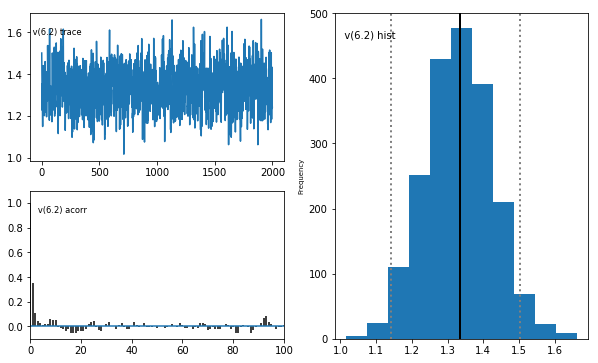

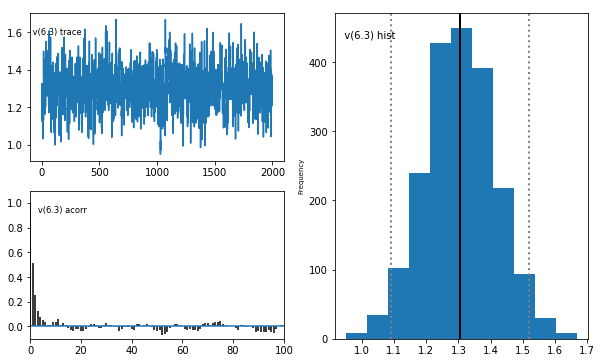

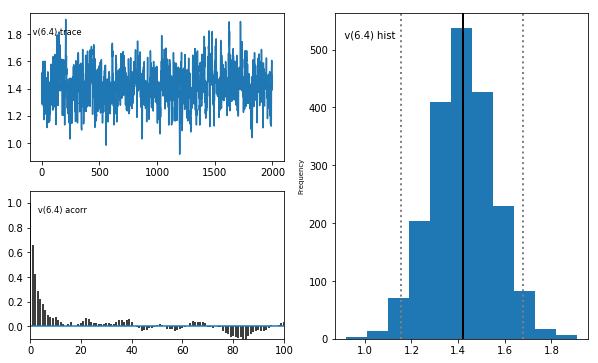

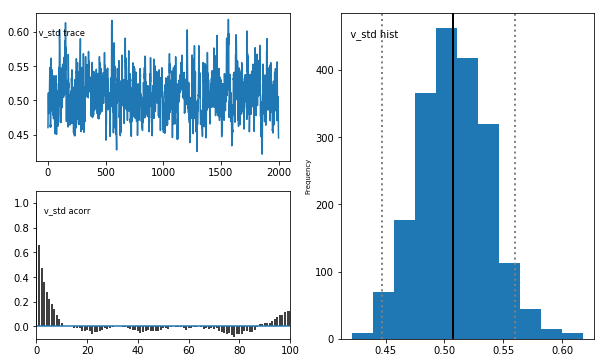

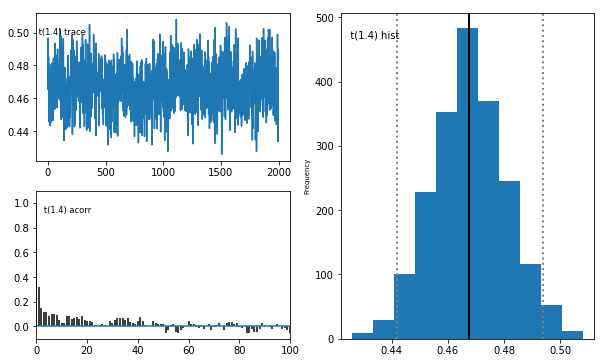

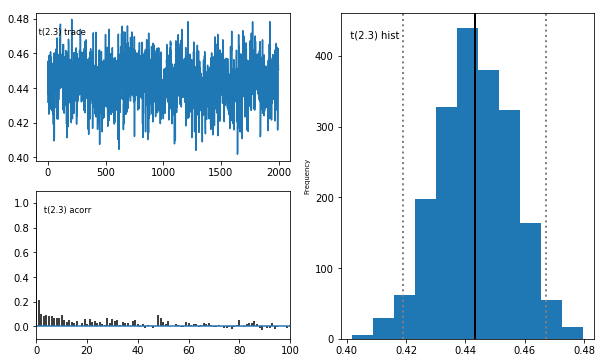

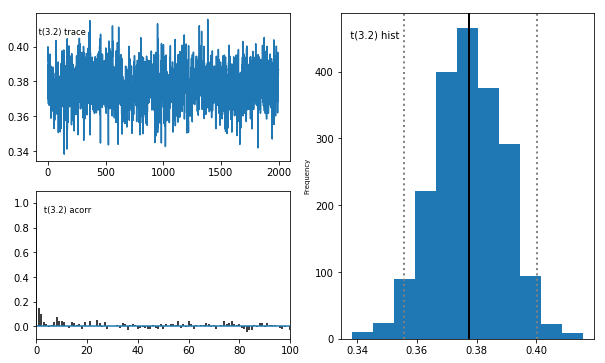

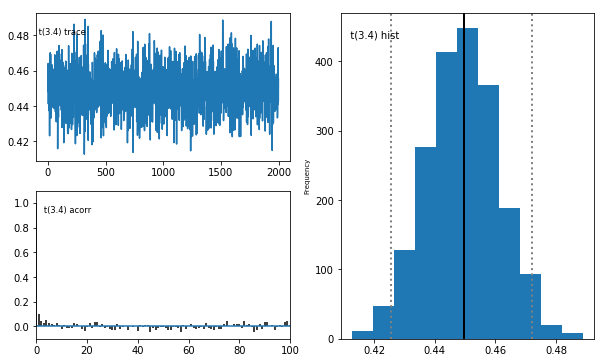

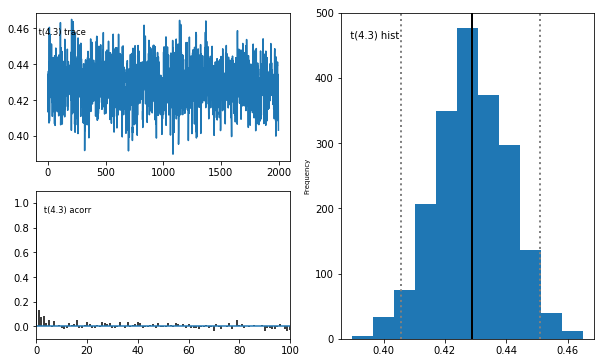

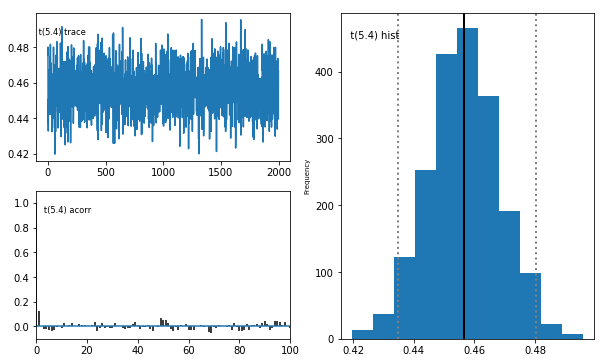

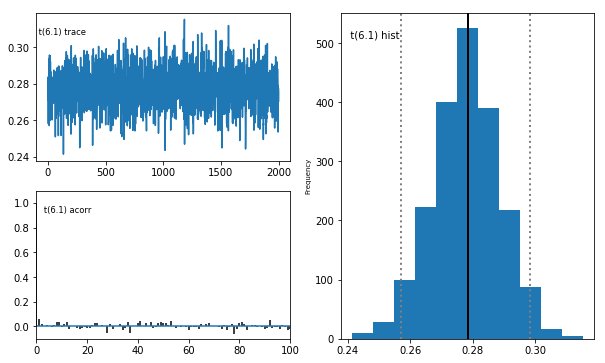

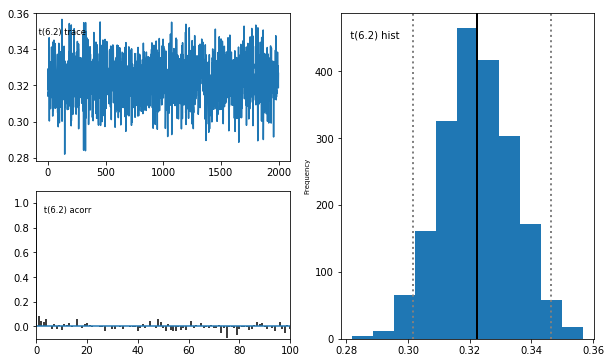

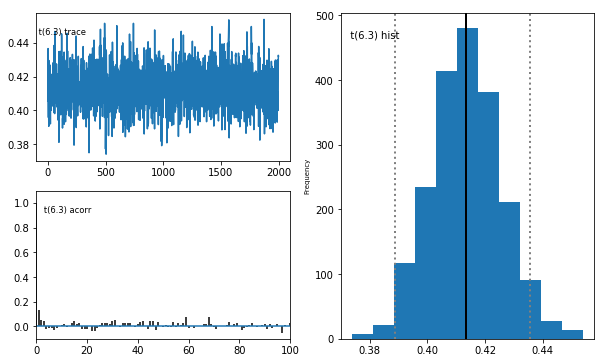

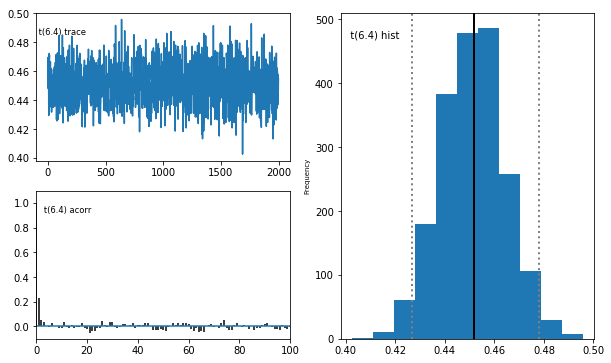

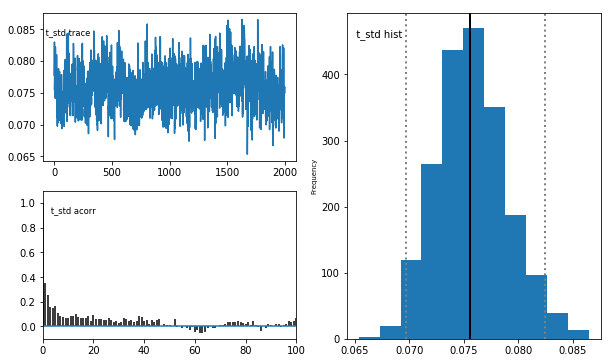

In [7]:
# posterior predictive check
m_dim_agree_v_t.plot_posterior_predictive()
m_dim_agree_v_t.plot_posteriors()

 [-----------------100%-----------------] 7000 of 7000 complete in 719.1 secModel m_L4_agree_v_t will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRIAgree/m_L4_agree_v_t
Data will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRIAgree/m_L4_agree_v_t.csv
Plotting a
Plotting a_std
Plotting v(1)
Plotting v(3)
Plotting v(5)
Plotting v(6)
Plotting v_std
Plotting t(1)
Plotting t(3)
Plotting t(5)
Plotting t(6)
Plotting t_std


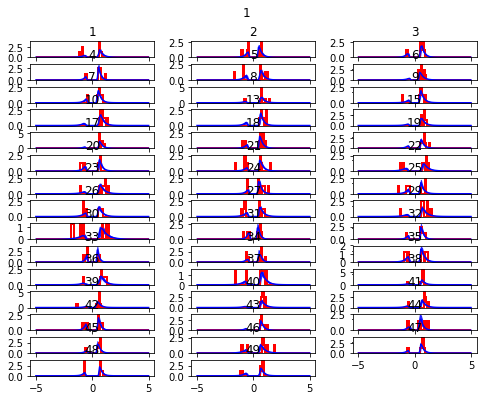

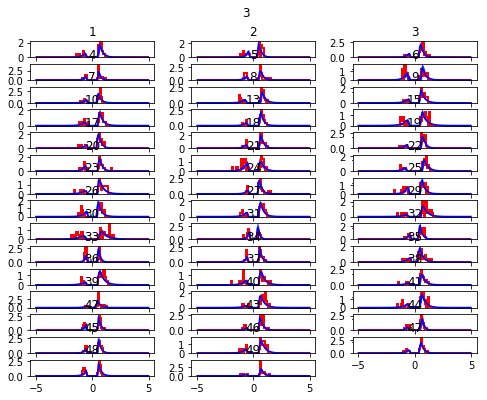

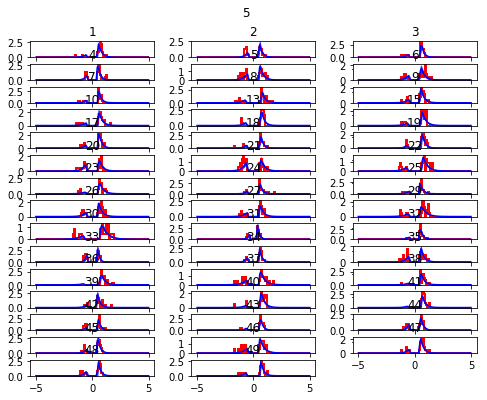

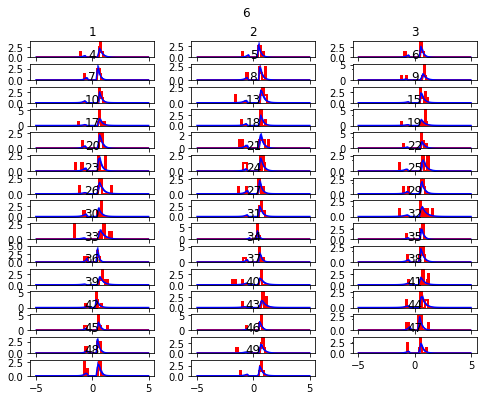

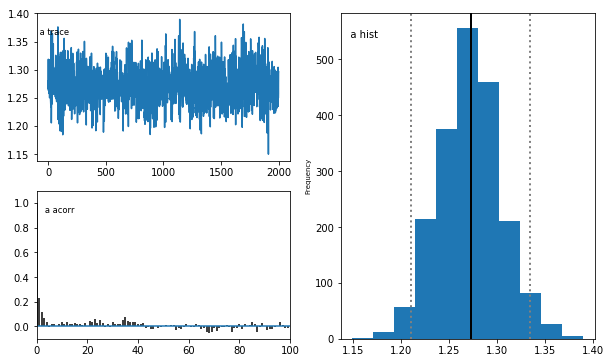

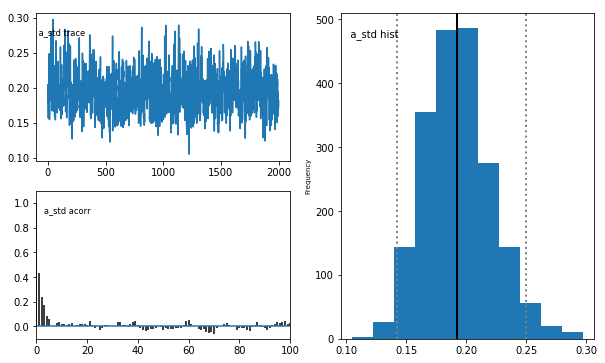

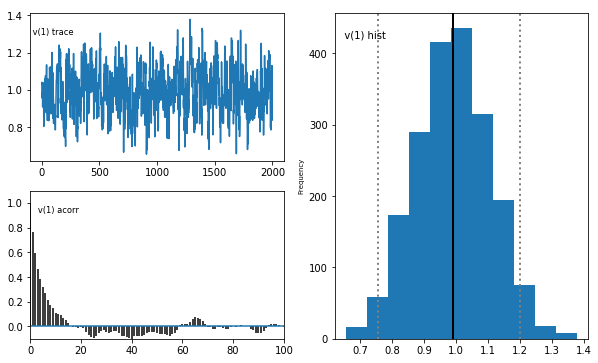

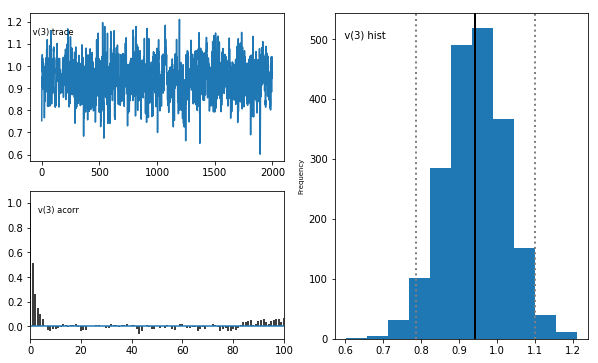

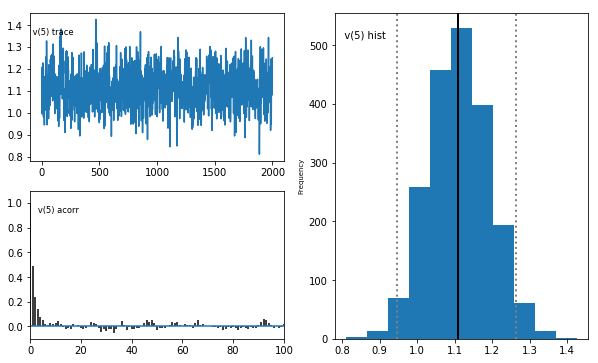

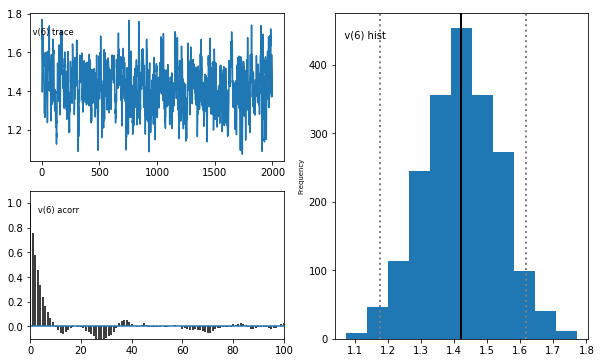

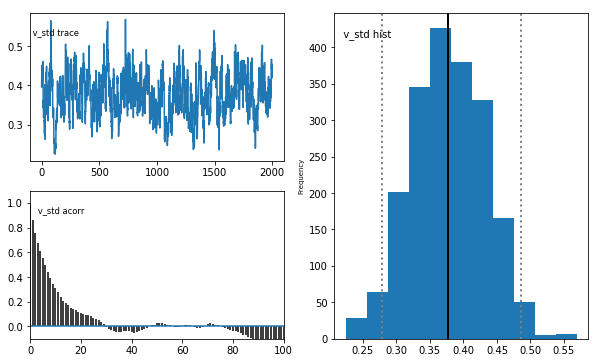

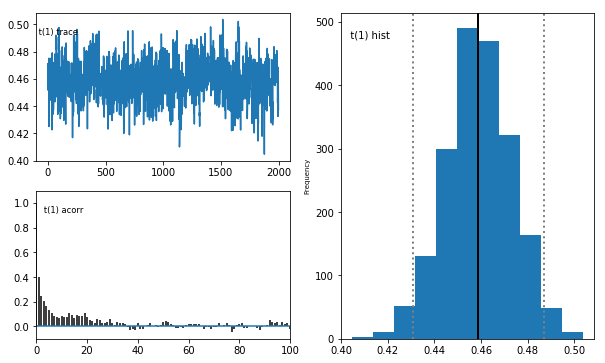

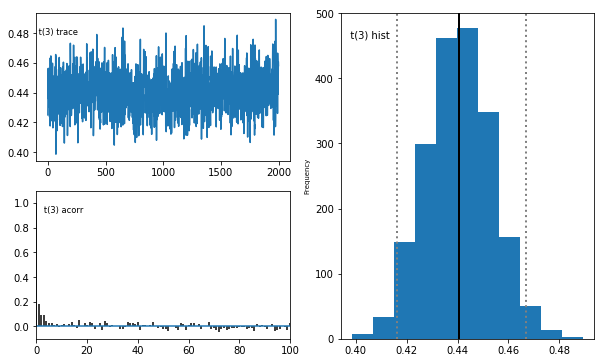

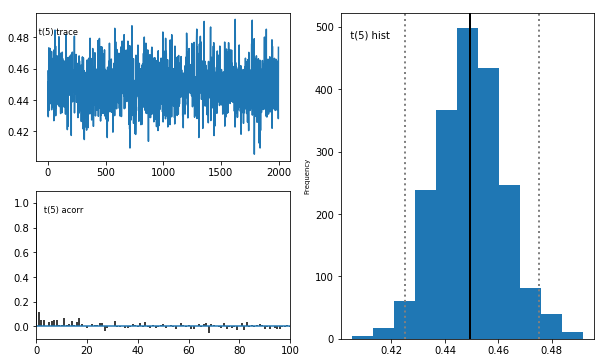

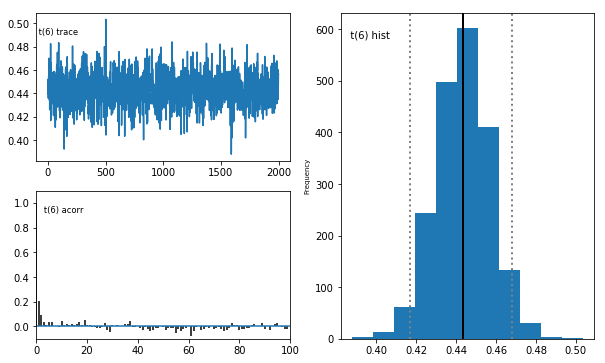

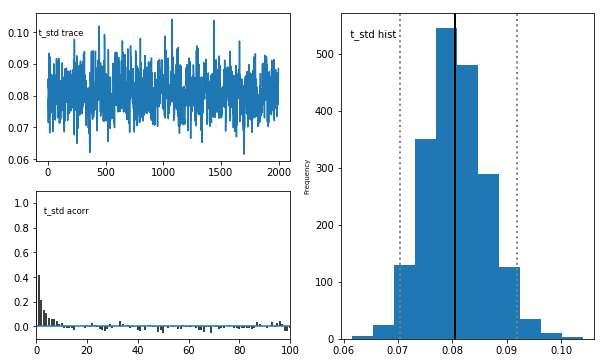

In [8]:
m_L4_agree_v_t = hddm.HDDM(data[is_l4], depends_on={'v': ['agree'], 't': ['agree']}, p_outlier=.05)
m_L4_agree_v_t.find_starting_values()
m_L4_agree_v_t.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_L4_agree_v_t will be saved at: '+ savePath+'m_L4_agree_v_t')
m_L4_agree_v_t.savePatch = savePatch(m_L4_agree_v_t, savePath+'m_L4_agree_v_t')
# save individual results as CSV
dataMat = m_L4_agree_v_t.get_traces()
fileName = 'm_L4_agree_v_t.csv'
print('Data will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

# posterior predictive check
m_L4_agree_v_t.plot_posterior_predictive()
m_L4_agree_v_t.plot_posteriors()

 [-----------------100%-----------------] 7000 of 7000 complete in 737.1 secModel m_agree_dim_v_t will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRIAgree/m_agree_dim_v_t
Data will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/MRIAgree/m_agree_dim_v_t.csv
Plotting a
Plotting a_std
Plotting v(1)
Plotting v(2)
Plotting v(3)
Plotting v(4)
Plotting v_std
Plotting t(1)
Plotting t(2)
Plotting t(3)
Plotting t(4)
Plotting t_std


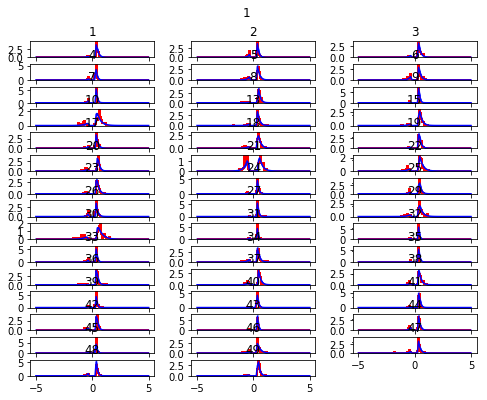

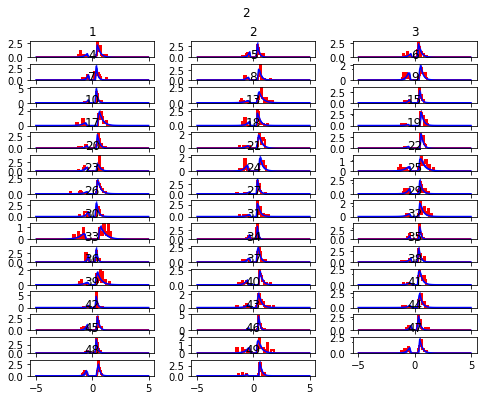

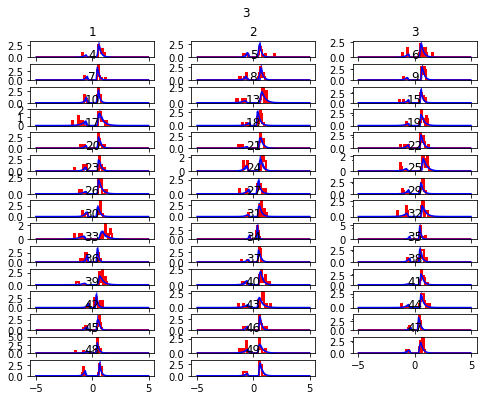

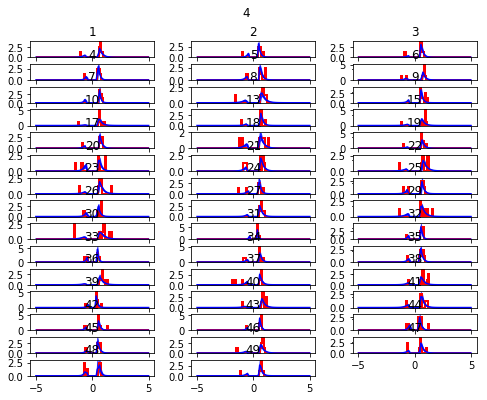

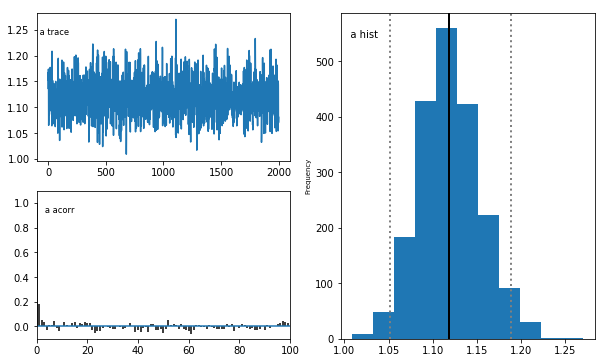

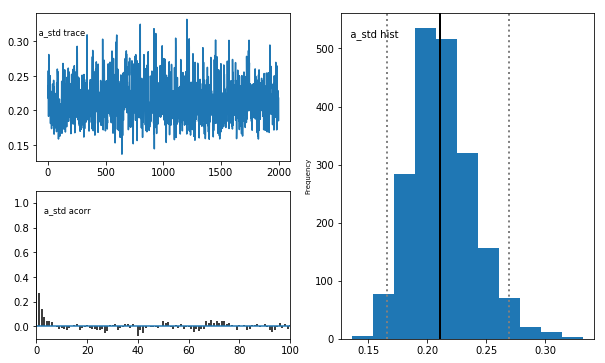

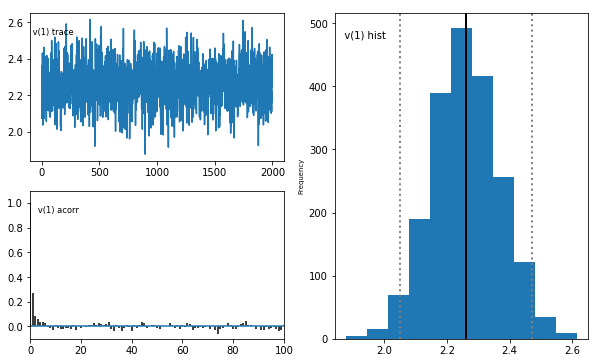

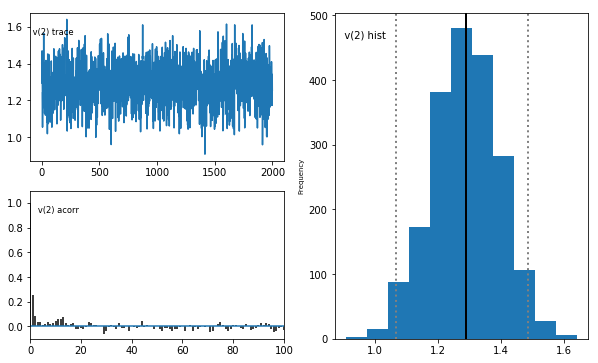

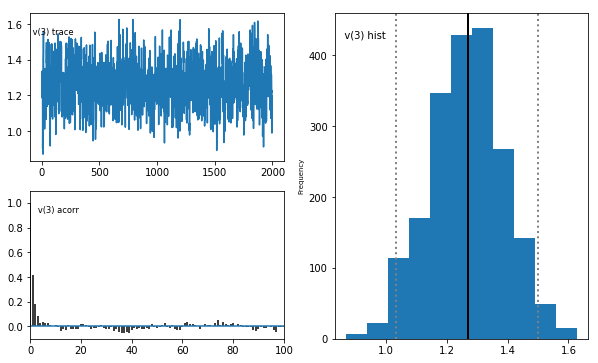

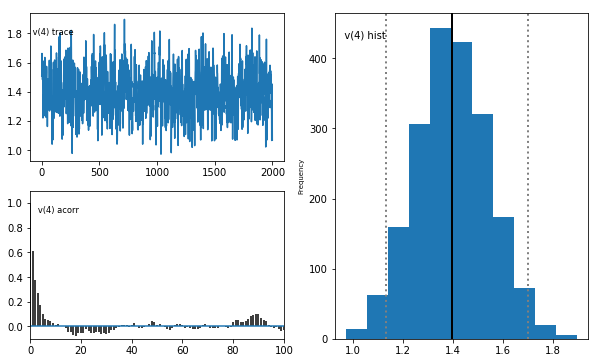

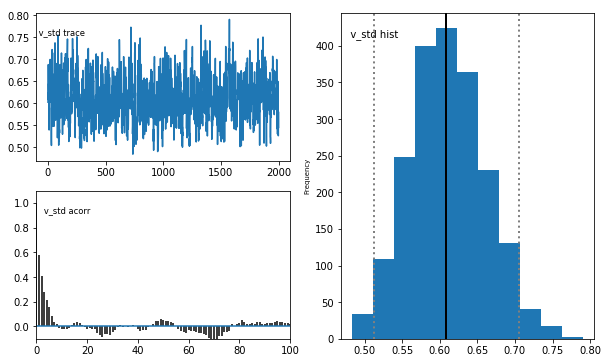

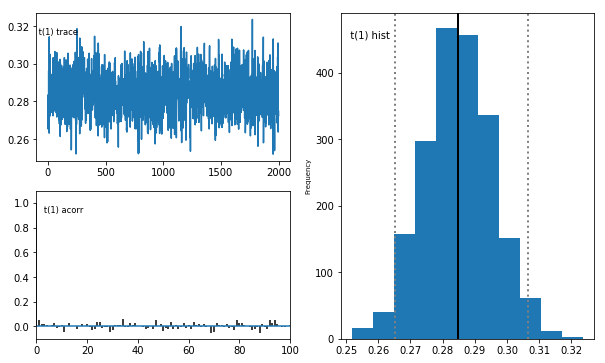

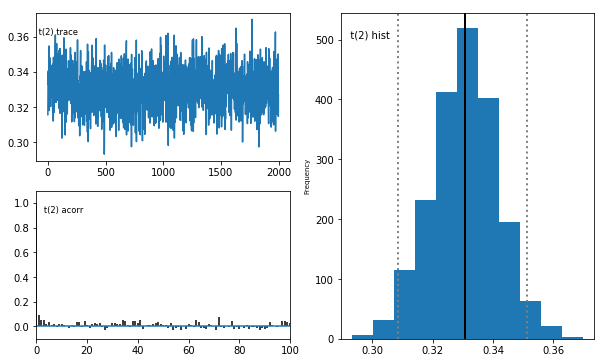

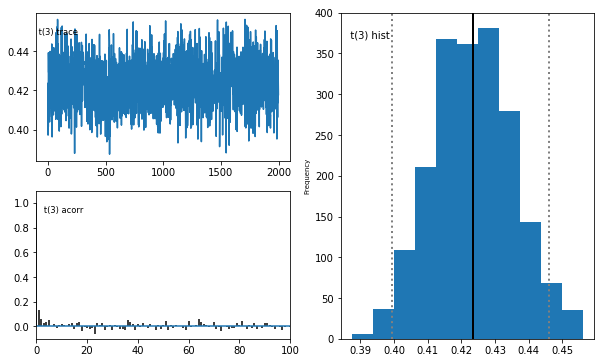

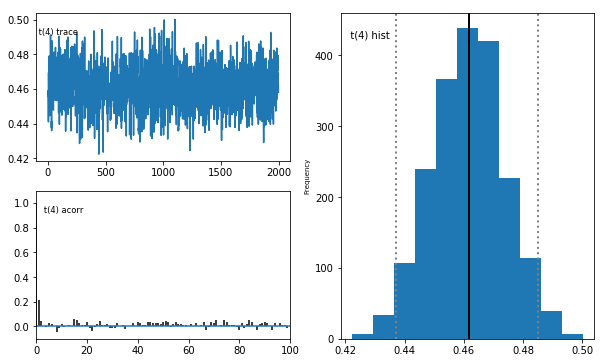

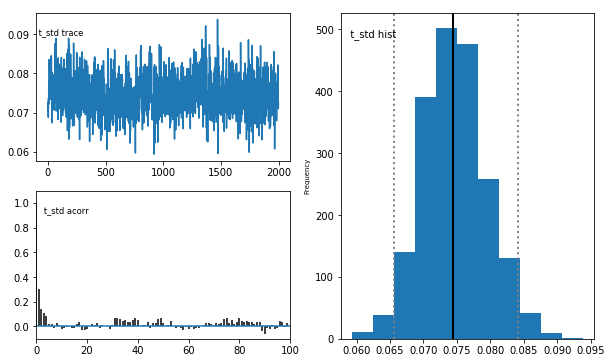

In [9]:
m_agree_dim_v_t = hddm.HDDM(data[data.agree == 6], depends_on={'v': ['dim'], 't': ['dim']}, p_outlier=.05)
m_agree_dim_v_t.find_starting_values()
m_agree_dim_v_t.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_agree_dim_v_t will be saved at: '+ savePath+'m_agree_dim_v_t')
m_agree_dim_v_t.savePatch = savePatch(m_agree_dim_v_t, savePath+'m_agree_dim_v_t')
# save individual results as CSV
dataMat = m_agree_dim_v_t.get_traces()
fileName = 'm_agree_dim_v_t.csv'
print('Data will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

# posterior predictive check
m_agree_dim_v_t.plot_posterior_predictive()
m_agree_dim_v_t.plot_posteriors()

In [10]:
print("Model m_dim_agree_v_t DIC: %f" % m_dim_agree_v_t.dic)

Model m_dim_agree_v_t DIC: 3194.680104
